In [1]:
from briefcase.case import Case
from briefcase.case_base import CaseBase
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import TelcoConverter as TC

cmap = plt.colormaps['tab10']


def test_inconsistency(data):
    cases = [Case.from_dict(c) for c in data]
    cb = CaseBase(cases)  # Todo this is really really slow, but do we care?
    return cb.metrics()


def generate_data_and_plot(cluster="corr"):
    percentage_test = [0.05, 0.25, 0.5, 0.75]
    filter_perc_list = [0.02077, 0.1614, 0.74291, 3.70478]
    inconsistency_counts = []
    test_sizes = []
    filtered_inconsistency_counts = [[] for _ in range(len(filter_perc_list))]
    filtered_test_sizes = [[] for _ in range(len(filter_perc_list))]

    for idx, param in enumerate(percentage_test):
        test_data = TC.get_existing_test_data(cluster, str(param))
        test_size, inconsistency_count = test_inconsistency(test_data)
        test_sizes.append(test_size)
        inconsistency_counts.append(inconsistency_count)
        
        # Filter data for each percentage and calculate inconsistency
        for i, filter_perc in enumerate(filter_perc_list):
            filtered_test_data = TC.filter_data_by_power(test_data, filter_perc)
            filtered_test_size, filtered_inconsistency_count = test_inconsistency(filtered_test_data)
            filtered_test_sizes[i].append(filtered_test_size) 
            filtered_inconsistency_counts[i].append(filtered_inconsistency_count)

    # Original data
    percentage_inconsistency = [((count / test_sizes[k]) * 100) for k, count in enumerate(inconsistency_counts)]
    plt.figure(figsize=(10, 6))
    plt.plot(percentage_test, percentage_inconsistency, marker='o', linestyle='-')
    plt.title(f'Percentage Total Cases Associated With Inconsistency vs Percentage Training Cases for {cluster.capitalize()} Labeling')
    plt.xlabel('Percentage Training Cases')
    plt.ylabel('Percentage of Cases Associated with Inconsistency')
    plt.grid(True)
    plt.show()

    # Plotting percentage of inconsistency vs percentage precedent cases for both sets of data
    plt.figure(figsize=(10, 6))
    for idx, filtered_inconsistency_count in enumerate(filtered_inconsistency_counts):
        percentage_inconsistency_filtered = []
        for k, count in enumerate(filtered_inconsistency_count):
            if count == 0:
                percentage_inconsistency_filtered.append(0)
            else:
                percentage_inconsistency_filtered.append(count / filtered_test_sizes[idx][k] * 100)
                
        plt.plot(percentage_test, percentage_inconsistency_filtered, marker='o', linestyle='-', label=f'{filter_perc_list[idx]:.2f}% max power', color=cmap(idx), alpha=0.7)
    plt.plot(percentage_test, percentage_inconsistency, marker='o', linestyle='-', label='ALL')
    plt.title(f'Percentage Total Cases Associated With Inconsistency vs Percentage Training Cases for {cluster.capitalize()} Labeling')
    plt.xlabel('Percentage Test Cases')
    plt.ylabel('Percentage of Cases Associated with Inconsistency')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    # Plotting percentage of inconsistency vs percentage precedent cases for both sets of data
    plt.figure(figsize=(10, 6))
    for idx, filtered_inconsistency_count in enumerate(filtered_inconsistency_counts):
        percentage_inconsistency_filtered = []
        for k, count in enumerate(filtered_inconsistency_count):
            if count == 0:
                percentage_inconsistency_filtered.append(0)
            else:
                percentage_inconsistency_filtered.append(count / filtered_test_sizes[idx][k] * 100)
                
        plt.plot(percentage_test, percentage_inconsistency_filtered, marker='o', linestyle='-', label=f'{filter_perc_list[idx]:.2f}% max power', color=cmap(idx), alpha=0.7)
    plt.plot(percentage_test, percentage_inconsistency, marker='o', linestyle='-', label='ALL')
    plt.title(f'Percentage Total Cases Associated With Inconsistency vs Percentage Training Cases for {cluster.capitalize()} Labeling')
    plt.xlabel('Percentage Test Cases')
    plt.ylabel('Percentage of Cases Associated with Inconsistency')
    plt.legend()
    plt.grid(True)
    plt.show()


### Initial stats

In [2]:
df, y_name = TC.get_df()
df[y_name].value_counts()

11 binary columns
bool       11
object      7
int64       2
float64     1
Name: count, dtype: int64
2 numerical columns - dropped


Churn
False    5174
True     1869
Name: count, dtype: int64

In [3]:
df.shape

(7043, 26)

### Random clustering
This does not technically depend on the size of the training data, since the training data is never used, but for comparability we will test it on the same splits

Loaded data successfully from 'data/telco-rand-test-0.05-False.yaml'
Number of cases:  352
Number of cases associated with inconsistency:  74
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  235
Number of cases associated with inconsistency:  7
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  329
Number of cases associated with inconsistency:  37
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  350
Number of cases associated with inconsistency:  70
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  352
Number of cases associated with inconsistency:  74

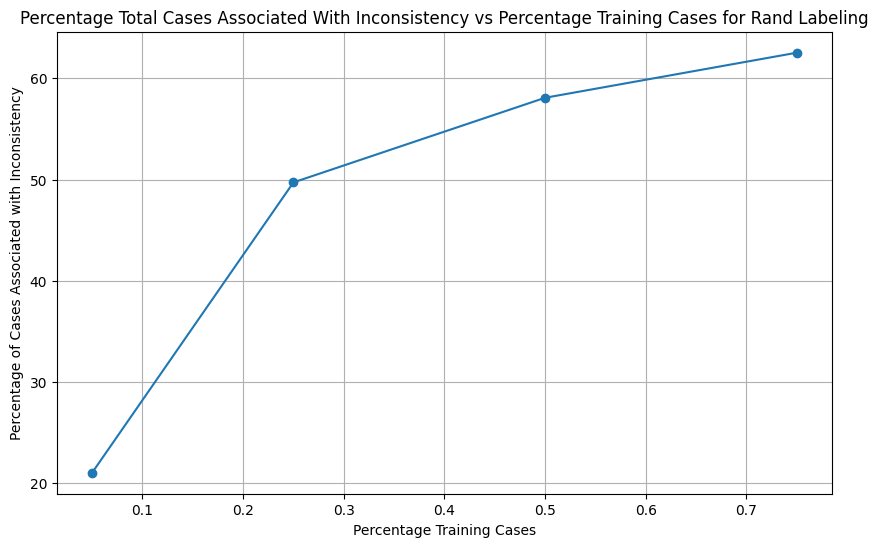

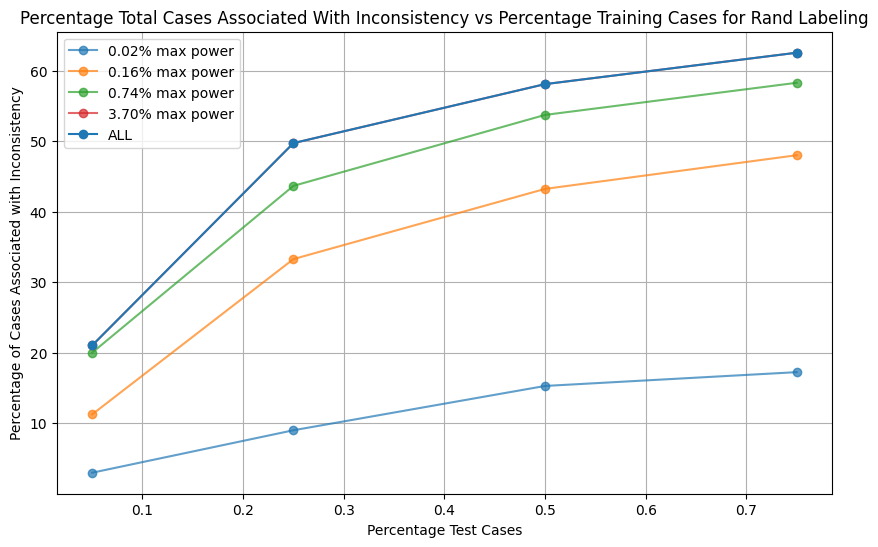

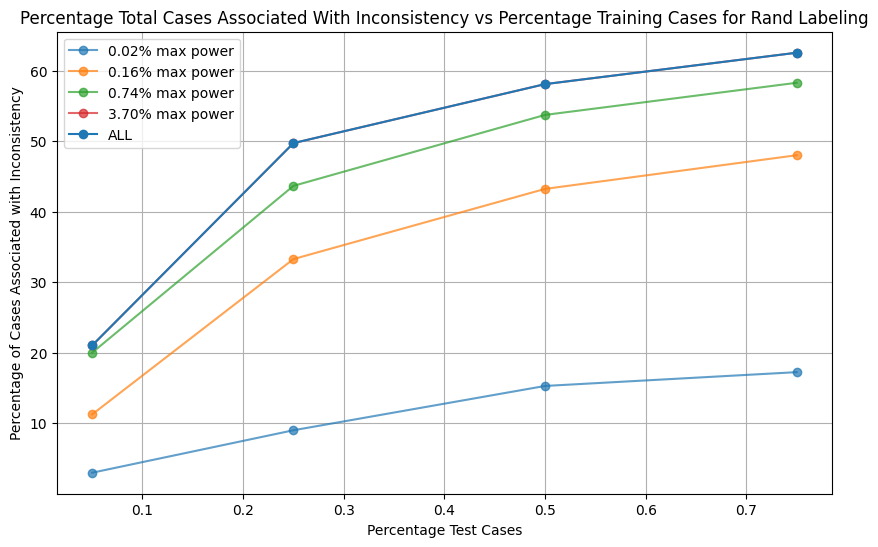

In [4]:
generate_data_and_plot("rand") # random seed = 42

Loaded data successfully from 'data/telco-rand_un-test-0.05-False.yaml'
Number of cases:  341
Number of cases associated with inconsistency:  180
Maximum number of edges on a pi case: 130816
Maximum number of edges on a delta case: 130816
Factors for pi: 9
Factors for delta: 9
Number of cases:  18
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 65408
Maximum number of edges on a delta case: 65280
Factors for pi: 8
Factors for delta: 9
Number of cases:  72
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 130816
Maximum number of edges on a delta case: 130816
Factors for pi: 9
Factors for delta: 9
Number of cases:  234
Number of cases associated with inconsistency:  40
Maximum number of edges on a pi case: 130816
Maximum number of edges on a delta case: 130816
Factors for pi: 9
Factors for delta: 9
Number of cases:  334
Number of cases associated with inconsistency:  162
Maximum number of edges on a pi case: 1

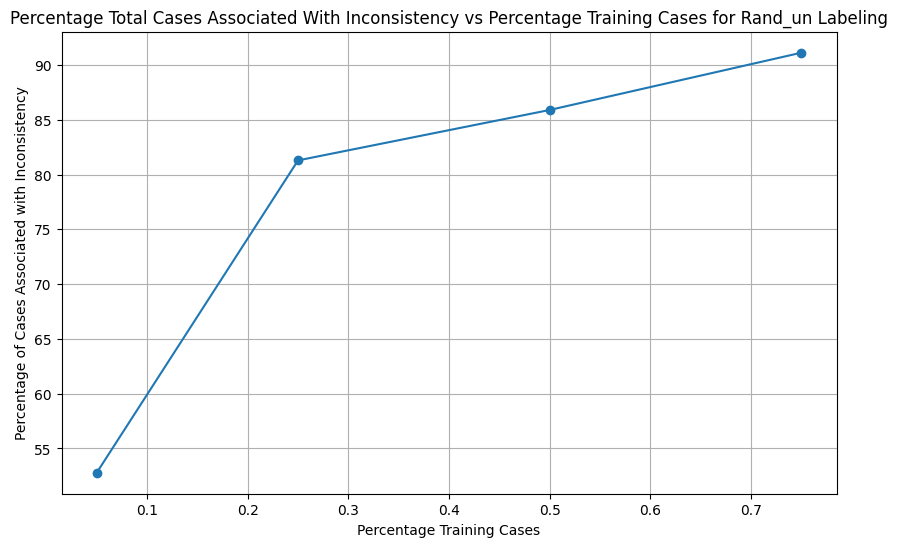

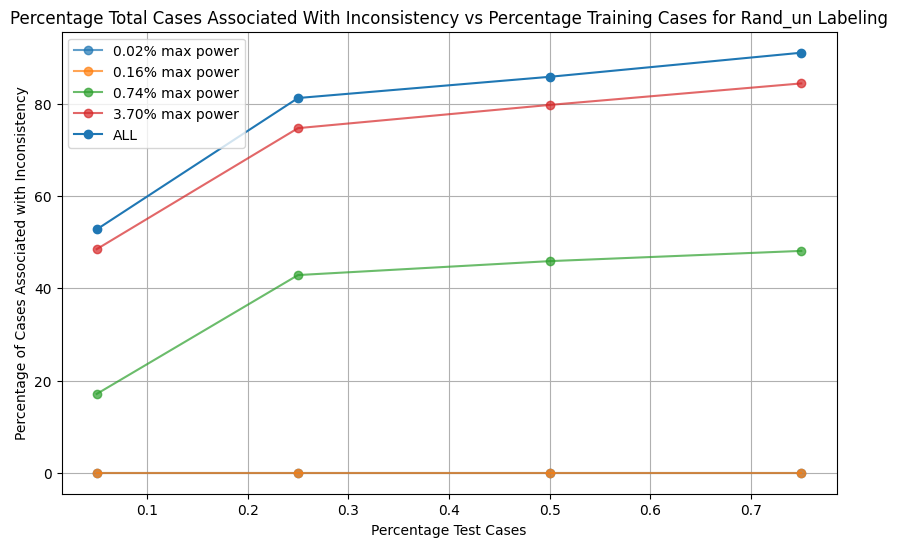

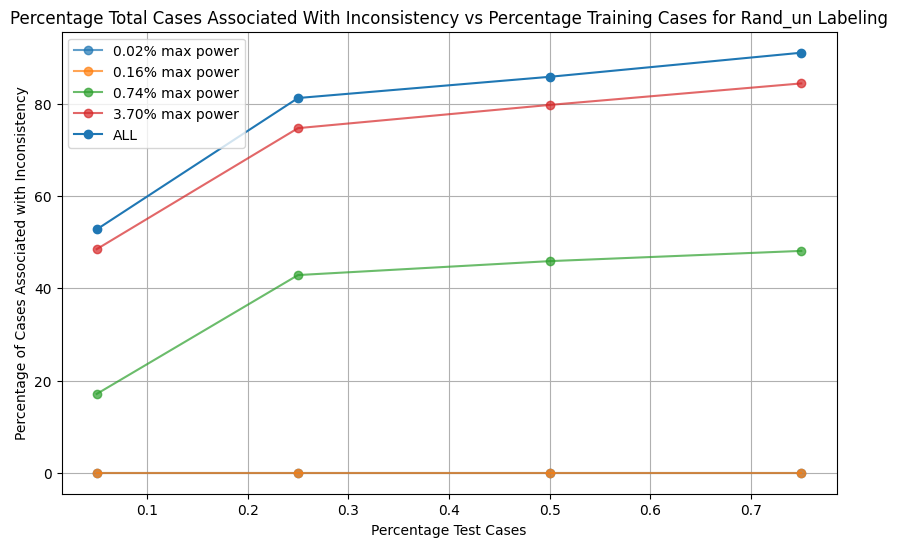

In [5]:
generate_data_and_plot("rand_un")


Loaded data successfully from 'data/telco-corr-test-0.05-False.yaml'
Number of cases:  278
Number of cases associated with inconsistency:  90
Maximum number of edges on a pi case: 523776
Maximum number of edges on a delta case: 523776
Factors for pi: 10
Factors for delta: 10
Number of cases:  93
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 523776
Maximum number of edges on a delta case: 523776
Factors for pi: 10
Factors for delta: 10
Number of cases:  161
Number of cases associated with inconsistency:  10
Maximum number of edges on a pi case: 523776
Maximum number of edges on a delta case: 523776
Factors for pi: 10
Factors for delta: 10
Number of cases:  197
Number of cases associated with inconsistency:  17
Maximum number of edges on a pi case: 523776
Maximum number of edges on a delta case: 523776
Factors for pi: 10
Factors for delta: 10
Number of cases:  242
Number of cases associated with inconsistency:  30
Maximum number of edges on a pi 

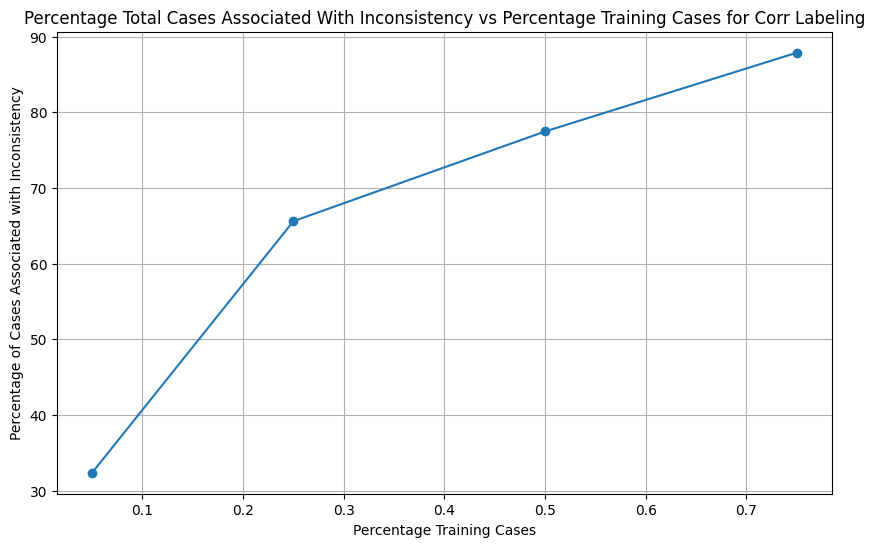

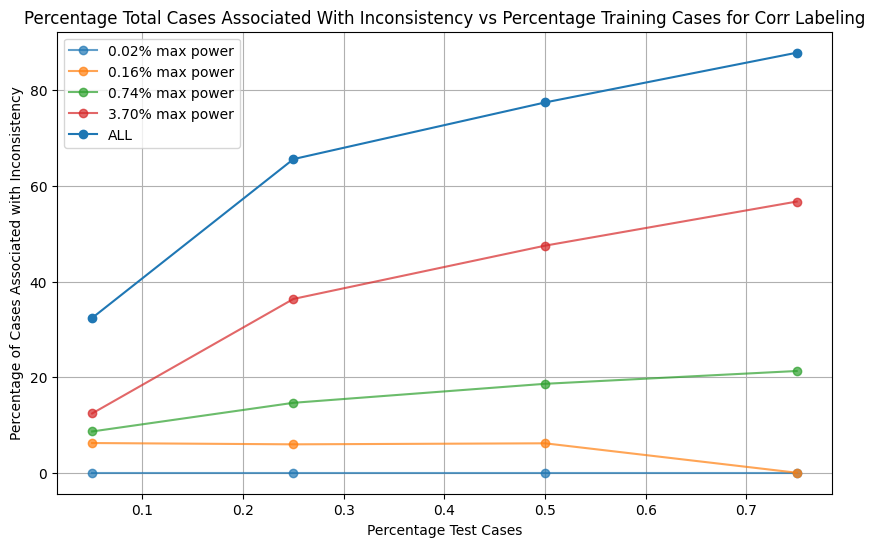

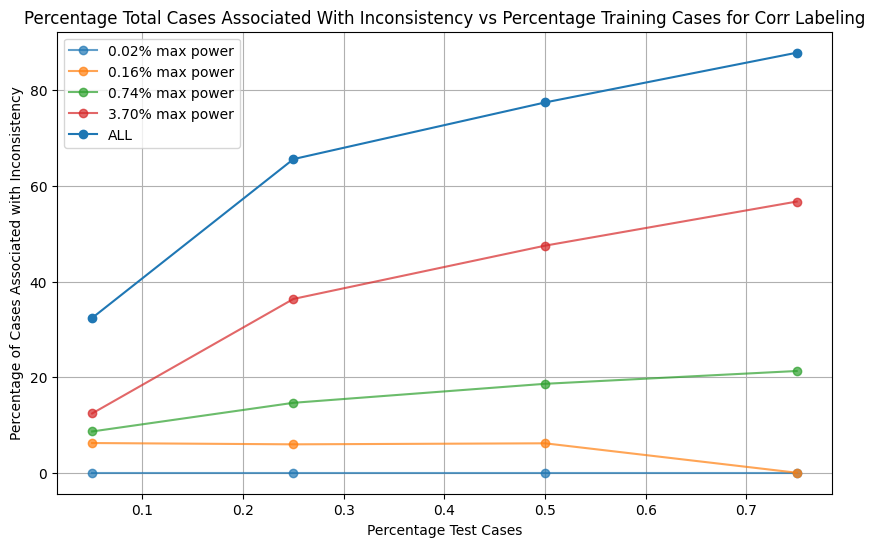

In [6]:
generate_data_and_plot("corr") 


There are way more cases with not Churn than Churn, so we have to proportionally sample before voting 

Loaded data successfully from 'data/telco-vote-test-0.05-False.yaml'
Number of cases:  334
Number of cases associated with inconsistency:  100
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  252
Number of cases associated with inconsistency:  8
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  298
Number of cases associated with inconsistency:  28
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  313
Number of cases associated with inconsistency:  39
Maximum number of edges on a pi case: 1073725440
Maximum number of edges on a delta case: 1073709056
Factors for pi: 15
Factors for delta: 16
Number of cases:  333
Number of cases associated with inconsistency:  9

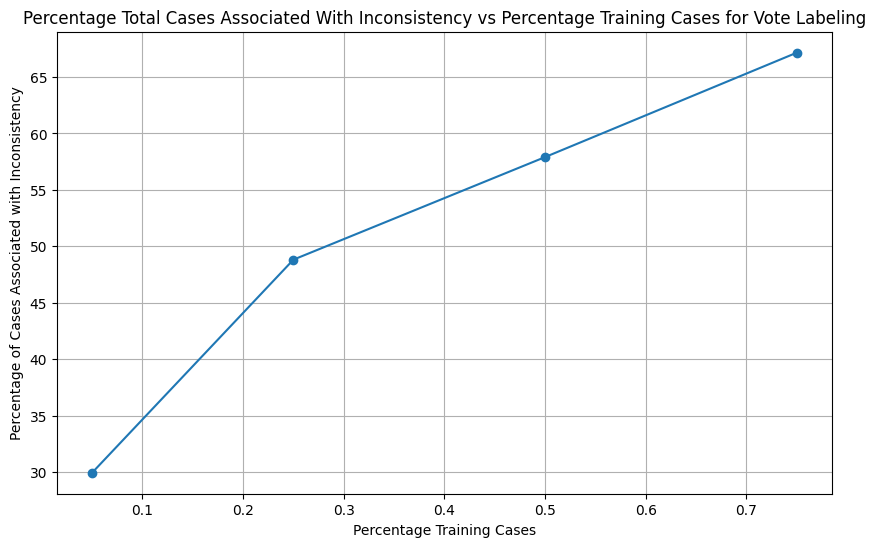

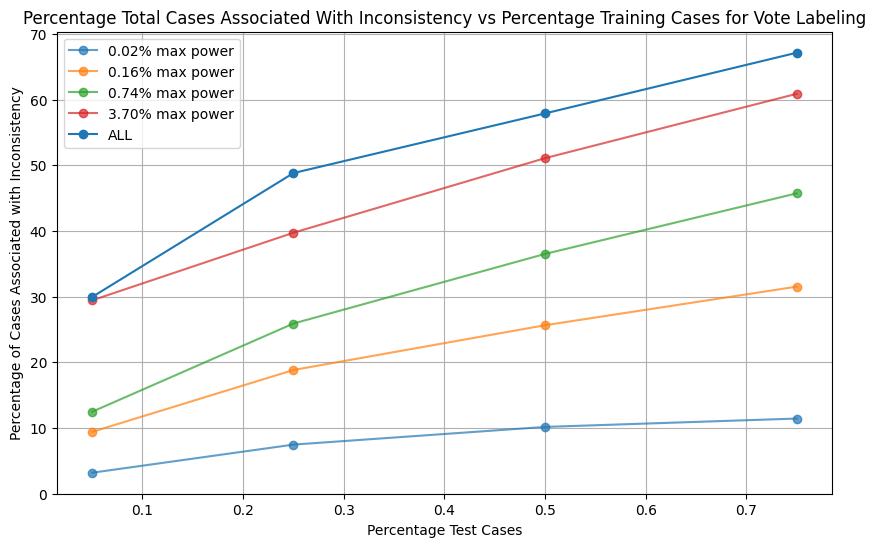

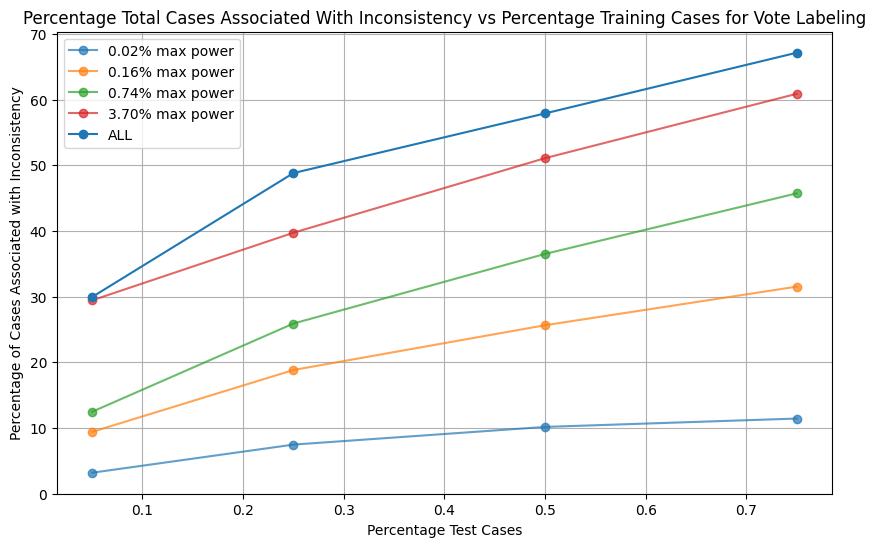

In [7]:
generate_data_and_plot("vote")